# Topic Modeling on Complete Corpus of Edgar Allan Poe's Short Stories

This Jupyter notebook performs topic modeling on a corpus of all 70 of Edgar Allan Poe's short stories. 

- Language: Python 3.8
- Libraries: pandas, wordcloud, matplotlib.pyplot, spacy, re, gensim, pyLDAvis


- Dataset source:
    - Leandro on Kaggle: https://www.kaggle.com/leangab/poe-short-stories-corpuscsv 
    
    
- Resources consulted when coding:
    - Codebooks from a program I'm taking: https://courses.analyticsvidhya.com/bundles/certified-natural-language-processing-master-s-program 
    - Article on topic modeling with gensim and pyLDAvis: https://towardsdatascience.com/topic-modeling-with-gensim-a5609cefccc 
    - Video on topic modeling with gensim: https://www.youtube.com/watch?v=NYkbqzTlW3w&t=1284s 


- Steps:
    - Loading the Dataset
    - Exploratory Data Analysis
    - Text Preprocessing
    - Topic Modeling
    - Analysis of Topics
    - Other Potential Approaches to Analyzing Corpus

## Loading the Dataset

In [1]:
#importing pandas and uploading dataset
import pandas as pd
stories = pd.read_csv('Edgar_Allan_Poe_short_stories_preprocessed_data.csv')
stories.head()

,title,text,wikipedia_title,publication_date,first_published_in,classification,notes,normalized_date
0,A DESCENT INTO THE MAELSTRÖM,"The ways of God in Nature, as in Providence, a...",A Descent into the Maelström,May 1841,Graham's Magazine,Adventure,?,May 1841
1,A PREDICAMENT,"What chance, good lady, hath bereft you thus? ...",A Predicament,November 1838,Baltimore American Museum,Parody,"Companion to ""How to Write a Blackwood Article...",November 1838
2,A TALE OF JERUSALEM,Intensos rigidarn in frontern ascendere canos ...,A Tale of Jerusalem,"June 9, 1832",Philadelphia Saturday Courier,Humor,?,June 1832
3,A TALE OF THE RAGGED MOUNTAINS,"DURING the fall of the year 1827, while residi...",A Tale of the Ragged Mountains,April 1844,Godey's Lady's Book,"Adventure,Science_fiction",?,April 1844
4,BERENICE,"Dicebant mihi sodales, si sepulchrum amicae vi...",Berenice,March 1835,Southern Literary Messenger,Horror,?,March 1835


In [2]:
#removing less relevant columns from dataframe and printing head of updated dataframe
stories = stories.drop('wikipedia_title', axis = 1)
stories = stories.drop('publication_date', axis = 1)
stories = stories.drop('first_published_in', axis = 1)
stories = stories.drop('notes', axis = 1)
stories.head()

,title,text,classification,normalized_date
0,A DESCENT INTO THE MAELSTRÖM,"The ways of God in Nature, as in Providence, a...",Adventure,May 1841
1,A PREDICAMENT,"What chance, good lady, hath bereft you thus? ...",Parody,November 1838
2,A TALE OF JERUSALEM,Intensos rigidarn in frontern ascendere canos ...,Humor,June 1832
3,A TALE OF THE RAGGED MOUNTAINS,"DURING the fall of the year 1827, while residi...","Adventure,Science_fiction",April 1844
4,BERENICE,"Dicebant mihi sodales, si sepulchrum amicae vi...",Horror,March 1835


In [3]:
#printing tail of updated dataframe
stories.tail()

,title,text,classification,normalized_date
65,THE BALLOON-HOAX,"[Astounding News by Express, via Norfolk!—The ...","Fiction,Hoax",April 1844
66,THE MYSTERY OF MARIE ROGET,A SEQUEL TO “THE MURDERS IN THE RUE MORGUE.” ...,Detective_fiction,November 1842
67,THE POETIC PRINCIPLE,"IN speaking of the Poetic Principle, I have no...",Essay,August 1849
68,THE UNPARALLELED ADVENTURES OF ONE HANS PFAAL,"BY late accounts from Rotterdam, that city see...","Hoax,Science_fiction",June 1835
69,X-ING A PARAGRAPH,AS it is well known that the ‘wise men’ came ‘...,Satire,May 1849


## Exploratory Data Analysis

In [4]:
#counting the number of stories
stories['text'].count()

70

In [5]:
#displaying the occurrence of each story genre
stories['classification'].value_counts()

Horror                         17
Humor                          13
Satire                          6
Essay                           4
Science_fiction                 4
Detective_fiction               3
Adventure                       3
Sketch                          3
Parody                          3
Hoax,Science_fiction            2
Hoax,Horror,Science_fiction     1
Fiction,Hoax                    1
Adventure,Science_fiction       1
Horror,Humor                    1
Horror,Satire                   1
Humor,Satire                    1
Horror,Ratiocination            1
Hoax,Satire                     1
Romance                         1
Detective_fiction,Satire        1
Fantasy                         1
Fantasy,Horror                  1
Name: classification, dtype: int64

In [6]:
#concatenating all the stories into one string
all_stories = " ".join(stories['text'])

In [7]:
#printing the first 1,000 characters of all the short stories
print(all_stories[:1000])

The ways of God in Nature, as in Providence, are not as our ways; nor are the models that we frame any way commensurate to the vastness, profundity, and unsearchableness of His works, which have a depth in them greater than the well of Democritus. Joseph Glanville.    WE had now reached the summit of the loftiest crag. For some minutes the old man seemed too much exhausted to speak.     “Not long ago,” said he at length, “and I could have guided you on this route as well as the youngest of my sons; but, about three years past, there happened to me an event such as never happened to mortal man—or at least such as no man ever survived to tell of—and the six hours of deadly terror which I then endured have broken me up body and soul. You suppose me a very old man—but I am not. It took less than a single day to change these hairs from a jetty black to white, to weaken my limbs, and to unstring my nerves, so that I tremble at the least exertion, and am frightened at a shadow. Do you know I 

In [8]:
#checking the length of all the stories
len(all_stories)

1914346

In [9]:
#importing libraries to create wordclouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [10]:
#defining wordcloud function
def create_wordcloud(text):
    text = str(text)
    wordcloud = WordCloud(width = 800, height = 660, background_color = 'white', max_words = 300)
    plt.figure(figsize = (14,12))
    wordcloud = wordcloud.generate(text)
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

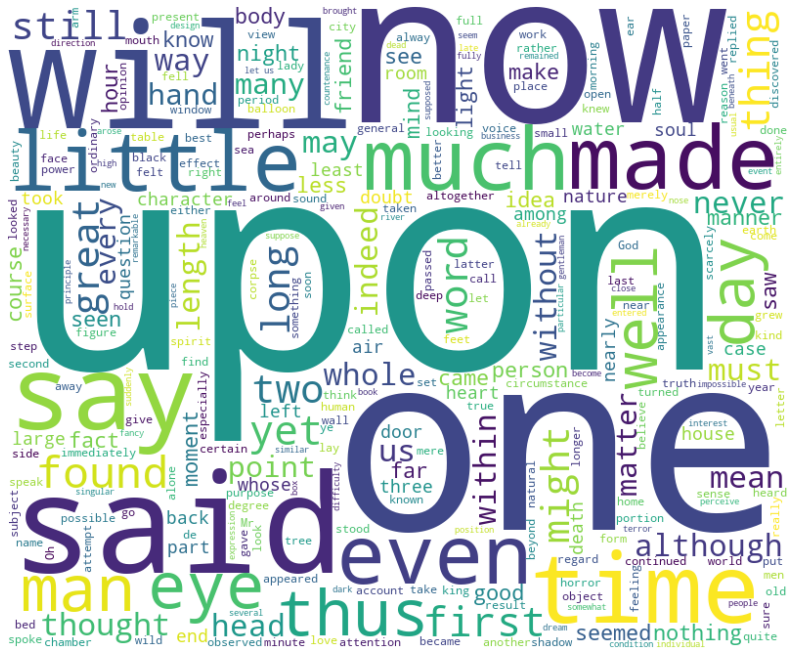

In [11]:
#wordcloud of all short stories before preprocessing
create_wordcloud(all_stories)

## Text Preprocessing

In [12]:
#making all letters in corpus lowercase
all_stories = all_stories.lower()

In [13]:
#importing spacy
import spacy

In [14]:
#loading English spacy model
nlp = spacy.load('en_core_web_sm')

In [15]:
#increasing max length to convert to doc object
if len(all_stories) <= 2000000:
    nlp.max_length = len(all_stories)

In [16]:
#converting corpus to doc object
doc = nlp(all_stories)

In [17]:
#printing an initial portion of the corpus
print(doc[:1000])

the ways of god in nature, as in providence, are not as our ways; nor are the models that we frame any way commensurate to the vastness, profundity, and unsearchableness of his works, which have a depth in them greater than the well of democritus. joseph glanville.    we had now reached the summit of the loftiest crag. for some minutes the old man seemed too much exhausted to speak.     “not long ago,” said he at length, “and i could have guided you on this route as well as the youngest of my sons; but, about three years past, there happened to me an event such as never happened to mortal man—or at least such as no man ever survived to tell of—and the six hours of deadly terror which i then endured have broken me up body and soul. you suppose me a very old man—but i am not. it took less than a single day to change these hairs from a jetty black to white, to weaken my limbs, and to unstring my nerves, so that i tremble at the least exertion, and am frightened at a shadow. do you know i 

In [18]:
#list comprehension to lemmatize words and remove stop words, punctuation, digits, and anything that's not a noun or adjective
doc = [token.lemma_ for token in doc if (token.is_stop == False and token.is_punct == False and token.is_digit == False and (token.pos_ == 'NOUN' or token.pos_ == 'PROPN' or token.pos_ == 'ADJ'))]

In [19]:
#printing the first 500 tokens of the corpus
print(doc[:500])

['way', 'god', 'nature', 'providence', 'way', 'model', 'way', 'commensurate', 'vastness', 'profundity', 'unsearchableness', 'work', 'depth', 'great', 'democritus', 'joseph', 'glanville', 'summit', 'lofty', 'crag', 'minute', 'old', 'man', 'length', 'route', 'young', 'son', 'year', 'past', 'event', 'mortal', 'man', 'man', 'hour', 'deadly', 'terror', 'body', 'soul', 'old', 'man', 'single', 'day', 'hair', 'jetty', 'black', 'white', 'limb', 'nerve', 'exertion', 'shadow', 'little', 'cliff', 'giddy', 'little', 'cliff', 'edge', 'weighty', 'portion', 'body', 'tenure', 'elbow', 'extreme', 'slippery', 'edge', 'little', 'cliff', 'unobstructed', 'precipice', 'black', 'rock', 'foot', 'world', 'crag', 'dozen', 'yard', 'brink', 'truth', 'perilous', 'position', 'companion', 'length', 'ground', 'shrub', 'sky', 'vain', 'idea', 'foundation', 'mountain', 'danger', 'fury', 'wind', 'long', 'sufficient', 'courage', 'distance', 'fancy', 'guide', 'good', 'possible', 'view', 'scene', 'event', 'story', 'spot', 'e

In [20]:
#checking 50 most common nouns and adjectives in corpus
word_counts = pd.Series([token for token in doc]).value_counts()
print(word_counts[:50])

man          590
great        496
time         493
little       444
eye          442
day          432
thing        387
mr           348
word         332
good         300
head         298
length       298
hand         277
old          272
way          264
matter       255
foot         251
point        245
long         239
night        236
fact         231
idea         230
body         229
person       214
year         208
hour         207
friend       204
manner       204
large        203
door         201
moment       198
room         193
course       191
character    189
minute       187
mind         186
light        186
death        180
general      179
nature       178
life         178
water        177
air          175
heart        173
voice        170
house        168
period       167
question     164
world        164
end          158
dtype: int64


In [21]:
#converting back to string
cleaned_stories = str(doc)

In [22]:
#printing the first 1,000 characters of the string
print(cleaned_stories[:1000])

['way', 'god', 'nature', 'providence', 'way', 'model', 'way', 'commensurate', 'vastness', 'profundity', 'unsearchableness', 'work', 'depth', 'great', 'democritus', 'joseph', 'glanville', 'summit', 'lofty', 'crag', 'minute', 'old', 'man', 'length', 'route', 'young', 'son', 'year', 'past', 'event', 'mortal', 'man', 'man', 'hour', 'deadly', 'terror', 'body', 'soul', 'old', 'man', 'single', 'day', 'hair', 'jetty', 'black', 'white', 'limb', 'nerve', 'exertion', 'shadow', 'little', 'cliff', 'giddy', 'little', 'cliff', 'edge', 'weighty', 'portion', 'body', 'tenure', 'elbow', 'extreme', 'slippery', 'edge', 'little', 'cliff', 'unobstructed', 'precipice', 'black', 'rock', 'foot', 'world', 'crag', 'dozen', 'yard', 'brink', 'truth', 'perilous', 'position', 'companion', 'length', 'ground', 'shrub', 'sky', 'vain', 'idea', 'foundation', 'mountain', 'danger', 'fury', 'wind', 'long', 'sufficient', 'courage', 'distance', 'fancy', 'guide', 'good', 'possible', 'view', 'scene', 'event', 'story', 'spot', 'e

In [23]:
#importing re library to remove unnecessary quotation marks from updated wordcloud
import re
cleaned_stories = re.sub('\'','',cleaned_stories)

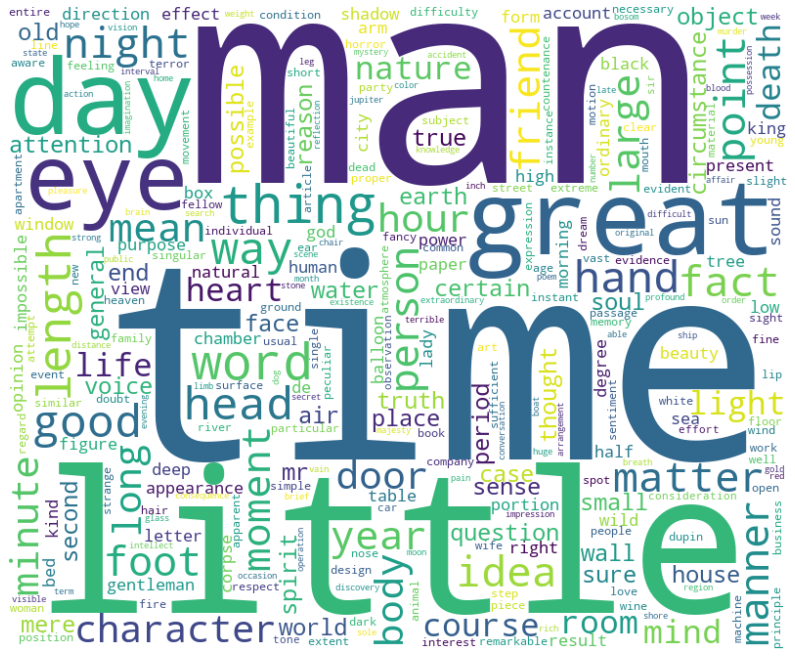

In [24]:
#wordcloud of preprocessed corpus
create_wordcloud(cleaned_stories)

## Topic Modeling

In [25]:
#importing gensim for topic modeling
from gensim import corpora, models

In [26]:
#defining vocab
vocab = [token.split() for token in doc]

In [27]:
#defining dictionary
dictionary = corpora.Dictionary(vocab)

In [28]:
#defining vectors
vectors = [dictionary.doc2bow(text) for text in vocab]

In [29]:
#using TF-IDF model
tfidf = models.TfidfModel(vectors)

In [30]:
#transforming TF-IDF
transformed_tfidf = tfidf[vectors]

In [31]:
#using Latent Dirichlet Allocation model and specifying number of topics and passes
lda = models.LdaMulticore(transformed_tfidf, num_topics = 6, id2word = dictionary, passes = 100)

In [32]:
#showing topic vectors
lda.show_topics()

[(0,
  '0.035*"man" + 0.018*"head" + 0.018*"good" + 0.015*"point" + 0.015*"body" + 0.014*"long" + 0.012*"moment" + 0.011*"earth" + 0.010*"life" + 0.010*"world"'),
 (1,
  '0.019*"word" + 0.016*"hand" + 0.016*"old" + 0.014*"fact" + 0.013*"manner" + 0.013*"person" + 0.012*"year" + 0.011*"light" + 0.010*"end" + 0.009*"sense"'),
 (2,
  '0.026*"day" + 0.015*"matter" + 0.014*"idea" + 0.012*"course" + 0.012*"large" + 0.012*"door" + 0.012*"friend" + 0.012*"mind" + 0.011*"general" + 0.010*"question"'),
 (3,
  '0.030*"time" + 0.025*"eye" + 0.014*"night" + 0.011*"minute" + 0.011*"period" + 0.011*"character" + 0.010*"water" + 0.009*"soul" + 0.009*"attention" + 0.009*"right"'),
 (4,
  '0.029*"great" + 0.025*"little" + 0.019*"mr" + 0.016*"length" + 0.014*"foot" + 0.014*"way" + 0.012*"hour" + 0.010*"air" + 0.010*"nature" + 0.009*"truth"'),
 (5,
  '0.021*"thing" + 0.011*"room" + 0.010*"heart" + 0.010*"death" + 0.010*"case" + 0.009*"voice" + 0.009*"place" + 0.009*"small" + 0.008*"reason" + 0.008*"gentle

In [33]:
#importing LDA visualization tool
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [34]:
#running gensim vectors through pyLDAvis
topics = pyLDAvis.gensim.prepare(lda, vectors, dictionary)

In [35]:
#showing main topics in Edgar Allan Poe's short stories
topics

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.366004 -0.027165       1        1  17.066687
5     -0.103664 -0.341676       2        1  16.867294
3     -0.065353  0.069727       3        1  16.554956
2     -0.053635  0.037438       4        1  16.534172
1     -0.074116  0.162860       5        1  16.529013
0     -0.069237  0.098815       6        1  16.447874, topic_info=            Term        Freq       Total Category  logprob  loglift
20           man  556.000000  556.000000  Default  30.0000  30.0000
155         time  488.000000  488.000000  Default  29.0000  29.0000
11         great  478.000000  478.000000  Default  28.0000  28.0000
35           day  422.000000  422.000000  Default  27.0000  27.0000
44        little  409.000000  409.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
519       slight   91.515976   92.302574   Topic6  -5.1607   1.7964
403      natural   90.706253   91.492851   Topic6  -5.1696   1.7963
135         mile   87.217110   88.003708   Topic6  -5.2088   1.7960
1779  atmosphere   86.853180   87.639786   Topic6  -5.2130   1.7960
937        party   84.897964   85.684563   Topic6  -5.2358   1.7958

[210 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
119       6  0.994337     account
917       1  0.995557         age
629       1  0.995896         air
240       3  0.995302    apparent
150       4  0.991700  appearance
...     ...       ...         ...
409       5  0.995983        word
9         6  0.991642        work
58        6  0.997628       world
25        5  0.998325        year
23        2  0.990930       young

[180 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 4, 3, 2, 1])

## Analysis of Topics

- The topics in Edgar Allan Poe's short stories:

    - **Time:** time, night, day, morning, year, moment, minute, period, hour
    - **Nature and elements:** light, dark, nature, natural, tree, air, earth, world, water, sea, river, life, sun, moon
    - **Thoughts, ideas, and emotions:** sentiment, principle, good, right, true, truth, reason, purpose, evidence, word, fact, love, idea, thought, doubt 
    - **Size and location:** little, small, large, low, high, surface, position, short, deep, long, length, mile
    - **Body and physicality:** head, eye, mouth, hand, arm, ear, face, foot, heart, voice, body, corpse, figure, form, appearance, person, people, human, man, mind, beauty
    - **The supernatural and the macabre:** soul, spirit, death, power, god, horror, terror, shadow, strange
    
 Note that if you rerun the code in this notebook, you might obtain slightly different topics!

## Other Potential Approaches to Analyzing Corpus

- Take an ensemble approach by comparing the LDA results above to outputs from Latent Semantic Indexing (LSI) and Non-negative Matrix Factorization (NMF)
- Perform topic modeling by story genre (such as horror vs. humor/satire vs. science fiction)
- Perform topic modeling by time: Did Edgar Allan Poe's stories become more or less macabre over time?